In [104]:
# Import all dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [105]:
# Get the holiday names
def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"
    
# Get the holidays from Calendar

dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())    
    

In [106]:
# Read the  csv
df = pd.read_csv( "spaceship_earth.csv")

# Cleanup the data to remove blank times and -999 for unavaiable data
df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]


In [107]:
# Data functions for date and datetime fields for further calculations
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create Time percentage as a feature
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

# Convert date field in meaningful features

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))


    
# Scale the data by bringing them as max 1
df['month'] = df['month'] / 12.0
df['day'] = df['day'] / 31.0
df['dayofweek'] = df['dayofweek'] / 6.0 
df['dayofyear'] = df['dayofyear'] / 366.0
df['weekofyear'] = df['weekofyear'] / 53.0
df['quarter'] = df['quarter'] / 4.0    


# Find if a date was a holiday

df['Holiday'] = df['date'].isin(holidays)
df['holidaynames'] = df['date'].apply(lambda row: us_holidays.get(row))


In [108]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames'],
      dtype='object')

In [109]:
df = pd.get_dummies(df, columns=['holidaynames'])

In [110]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames_Christmas Day', 'holidaynames_Christmas Day (Observed)',
       'holidaynames_Columbus Day', 'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')

In [112]:
print(df.shape)
df.head(10)

(245726, 30)


,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
0,2012-01-01,2012-01-01 16:41:00,5.0,NaN,0.695139,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
2,2012-01-01,2012-01-01 19:50:00,5.0,NaN,0.826389,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
4,2012-01-01,2012-01-01 20:12:00,5.0,NaN,0.841667,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
5,2012-01-02,2012-01-02 09:03:00,0.0,NaN,0.377083,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
7,2012-01-02,2012-01-02 09:26:00,5.0,NaN,0.393056,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
8,2012-01-02,2012-01-02 10:11:00,5.0,NaN,0.424306,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
9,2012-01-02,2012-01-02 11:19:00,20.0,NaN,0.471528,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
11,2012-01-02,2012-01-02 13:02:00,20.0,NaN,0.543056,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
12,2012-01-02,2012-01-02 13:23:00,20.0,NaN,0.557639,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
13,2012-01-02,2012-01-02 13:26:00,15.0,NaN,0.559722,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0


In [113]:
# Pick the X axis- featues
data=df.drop(columns=['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'year'])
columns=data.columns
print(columns)
data.head()

Index(['time_pct', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'Holiday', 'holidaynames_Christmas Day',
       'holidaynames_Christmas Day (Observed)', 'holidaynames_Columbus Day',
       'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
0,0.695139,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
2,0.826389,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
4,0.841667,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
5,0.377083,0.083333,0.064516,0.0,0.005464,0.018868,0.25,False,False,False,...,0,0,0,0,0,1,0,0,0,0
7,0.393056,0.083333,0.064516,0.0,0.005464,0.018868,0.25,False,False,False,...,0,0,0,0,0,1,0,0,0,0


In [114]:
#Y Axis
target = df['SPOSTMIN']

In [115]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print(X_train.shape)
X_train.head()
# X_test
# y_train
# y_test

(184294, 25)


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
155263,0.755556,0.666667,0.774194,0.333333,0.647541,0.641509,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
49506,0.395139,0.166667,0.032258,0.833333,0.087432,0.094340,0.25,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1351,0.579861,0.416667,0.806452,0.666667,0.398907,0.396226,0.50,False,False,False,...,0,0,0,0,0,0,0,0,0,0
132421,0.338889,0.083333,0.677419,0.500000,0.057377,0.056604,0.25,False,False,False,...,0,0,0,0,0,0,0,0,0,0
168043,0.552083,1.000000,0.741935,0.666667,0.978142,0.962264,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# first, create a normal neural network with 10 inputs, 3 hidden nodes, and 20 outputs LIner as we need waittimes
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1000, activation='relu', input_dim=25))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [152]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              26000     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_18 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 146,501
Trainable params: 146,501
Non-trainable params: 0
_________________________________________________________________


In [153]:
#Compile the model

model.compile(optimizer="adam", loss="mean_squared_error")

In [154]:
y_train.describe()

count    184294.000000
mean         16.972012
std          13.932093
min           0.000000
25%           5.000000
50%          15.000000
75%          25.000000
max         210.000000
Name: SPOSTMIN, dtype: float64

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
184294/184294 [==============================] - 39s 210us/step - loss: 137.0021
Epoch 2/1000
184294/184294 [==============================] - 39s 211us/step - loss: 101.3468
Epoch 3/1000
184294/184294 [==============================] - 38s 204us/step - loss: 95.9295
Epoch 4/1000
184294/184294 [==============================] - 36s 195us/step - loss: 92.6803
Epoch 5/1000
184294/184294 [==============================] - 37s 199us/step - loss: 90.6998
Epoch 6/1000
184294/184294 [==============================] - 37s 202us/step - loss: 89.0342
Epoch 7/1000
184294/184294 [==============================] - 36s 198us/step - loss: 87.5093
Epoch 8/1000
184294/184294 [==============================] - 37s 202us/step - loss: 86.2073
Epoch 9/1000
184294/184294 [==============================] - 37s 200us/step - loss: 84.9118
Epoch 10/1000
184294/184294 [==============================] - 36s 196us/step - loss: 83.8461
Epoch 11/1000
184294/184294 [==============================] - 36s 

184294/184294 [==============================] - 38s 204us/step - loss: 59.0508
Epoch 89/1000
184294/184294 [==============================] - 38s 205us/step - loss: 58.7913
Epoch 90/1000
184294/184294 [==============================] - 40s 216us/step - loss: 58.8506
Epoch 91/1000
184294/184294 [==============================] - 50s 272us/step - loss: 58.5313
Epoch 92/1000
184294/184294 [==============================] - 56s 305us/step - loss: 58.3274
Epoch 93/1000
184294/184294 [==============================] - 57s 309us/step - loss: 58.2098
Epoch 94/1000
184294/184294 [==============================] - 56s 304us/step - loss: 58.3002
Epoch 95/1000
184294/184294 [==============================] - 50s 272us/step - loss: 57.9827
Epoch 96/1000
184294/184294 [==============================] - 36s 196us/step - loss: 57.9015
Epoch 97/1000
184294/184294 [==============================] - 36s 195us/step - loss: 57.7469
Epoch 98/1000
184294/184294 [==============================] - 36s 196us/s

184294/184294 [==============================] - 33s 178us/step - loss: 51.8627
Epoch 175/1000
184294/184294 [==============================] - 34s 182us/step - loss: 51.8236
Epoch 176/1000
184294/184294 [==============================] - 34s 186us/step - loss: 51.6834
Epoch 177/1000
184294/184294 [==============================] - 35s 189us/step - loss: 51.6012
Epoch 178/1000
184294/184294 [==============================] - 33s 181us/step - loss: 51.4983
Epoch 179/1000
184294/184294 [==============================] - 29s 159us/step - loss: 51.4279
Epoch 180/1000
184294/184294 [==============================] - 26s 139us/step - loss: 51.3461
Epoch 181/1000
184294/184294 [==============================] - 26s 142us/step - loss: 51.5021
Epoch 182/1000
184294/184294 [==============================] - 27s 144us/step - loss: 51.3484
Epoch 183/1000
184294/184294 [==============================] - 27s 147us/step - loss: 51.2480
Epoch 184/1000
184294/184294 [==============================] - 2

184294/184294 [==============================] - 37s 202us/step - loss: 48.2821
Epoch 277/1000
184294/184294 [==============================] - 37s 198us/step - loss: 48.1184
Epoch 278/1000
184294/184294 [==============================] - 37s 203us/step - loss: 48.1441
Epoch 279/1000
184294/184294 [==============================] - 37s 202us/step - loss: 48.0213
Epoch 280/1000
184294/184294 [==============================] - 37s 202us/step - loss: 47.9472
Epoch 281/1000
184294/184294 [==============================] - 38s 204us/step - loss: 47.9358
Epoch 282/1000
184294/184294 [==============================] - 38s 206us/step - loss: 47.9906
Epoch 283/1000
184294/184294 [==============================] - 39s 214us/step - loss: 47.9919
Epoch 284/1000
184294/184294 [==============================] - 39s 214us/step - loss: 48.0108
Epoch 285/1000
184294/184294 [==============================] - 37s 202us/step - loss: 47.9656
Epoch 286/1000
184294/184294 [==============================] - 3

184294/184294 [==============================] - 35s 192us/step - loss: 46.4409
Epoch 363/1000
184294/184294 [==============================] - 35s 188us/step - loss: 46.3380
Epoch 364/1000
184294/184294 [==============================] - 36s 197us/step - loss: 46.4404
Epoch 365/1000
184294/184294 [==============================] - 44s 241us/step - loss: 46.3842
Epoch 366/1000
184294/184294 [==============================] - 37s 200us/step - loss: 46.3284
Epoch 367/1000
184294/184294 [==============================] - 35s 193us/step - loss: 46.2793
Epoch 368/1000
184294/184294 [==============================] - 35s 188us/step - loss: 46.2983
Epoch 369/1000
184294/184294 [==============================] - 35s 190us/step - loss: 46.4093
Epoch 370/1000
184294/184294 [==============================] - 35s 190us/step - loss: 46.3418
Epoch 371/1000
184294/184294 [==============================] - 35s 191us/step - loss: 46.2528
Epoch 372/1000
184294/184294 [==============================] - 3

184294/184294 [==============================] - 35s 190us/step - loss: 45.2340
Epoch 449/1000
184294/184294 [==============================] - 36s 195us/step - loss: 45.2316
Epoch 450/1000
184294/184294 [==============================] - 35s 189us/step - loss: 45.1064
Epoch 451/1000
184294/184294 [==============================] - 36s 197us/step - loss: 45.0248
Epoch 452/1000
184294/184294 [==============================] - 36s 198us/step - loss: 45.1339
Epoch 453/1000
184294/184294 [==============================] - 36s 197us/step - loss: 45.1439
Epoch 454/1000
184294/184294 [==============================] - 36s 193us/step - loss: 45.0313
Epoch 455/1000
184294/184294 [==============================] - 36s 197us/step - loss: 45.0312
Epoch 456/1000
184294/184294 [==============================] - 36s 197us/step - loss: 44.9728
Epoch 457/1000
184294/184294 [==============================] - 37s 201us/step - loss: 45.0485
Epoch 458/1000
184294/184294 [==============================] - 3

184294/184294 [==============================] - 37s 202us/step - loss: 44.1852
Epoch 535/1000
184294/184294 [==============================] - 37s 198us/step - loss: 44.1881
Epoch 536/1000
184294/184294 [==============================] - 34s 187us/step - loss: 44.1725
Epoch 537/1000
184294/184294 [==============================] - 34s 184us/step - loss: 44.1628
Epoch 538/1000
184294/184294 [==============================] - 34s 184us/step - loss: 44.3097
Epoch 539/1000
184294/184294 [==============================] - 35s 189us/step - loss: 44.1750
Epoch 540/1000
184294/184294 [==============================] - 35s 191us/step - loss: 44.1545
Epoch 541/1000
184294/184294 [==============================] - 37s 200us/step - loss: 44.2140
Epoch 542/1000
184294/184294 [==============================] - 34s 185us/step - loss: 44.3131
Epoch 543/1000
184294/184294 [==============================] - 34s 186us/step - loss: 44.1511
Epoch 544/1000
184294/184294 [==============================] - 3

184294/184294 [==============================] - 35s 187us/step - loss: 43.3352
Epoch 621/1000
184294/184294 [==============================] - 34s 182us/step - loss: 43.5092
Epoch 622/1000
184294/184294 [==============================] - 34s 182us/step - loss: 43.4068
Epoch 623/1000
184294/184294 [==============================] - 35s 188us/step - loss: 43.5459
Epoch 624/1000
184294/184294 [==============================] - 10837s 59ms/step - loss: 43.4798
Epoch 625/1000
184294/184294 [==============================] - 12025s 65ms/step - loss: 43.4777
Epoch 626/1000
184294/184294 [==============================] - 39s 210us/step - loss: 43.4681
Epoch 627/1000
184294/184294 [==============================] - 32s 174us/step - loss: 43.5224
Epoch 628/1000
184294/184294 [==============================] - 30s 163us/step - loss: 43.4274
Epoch 629/1000
184294/184294 [==============================] - 31s 169us/step - loss: 43.5151
Epoch 630/1000
184294/184294 [==============================]

184294/184294 [==============================] - 29s 155us/step - loss: 43.1885
Epoch 707/1000
184294/184294 [==============================] - 29s 158us/step - loss: 42.8490
Epoch 708/1000
184294/184294 [==============================] - 29s 156us/step - loss: 42.9765
Epoch 709/1000
184294/184294 [==============================] - 27s 148us/step - loss: 42.9365
Epoch 710/1000
184294/184294 [==============================] - 26s 144us/step - loss: 42.8935
Epoch 711/1000
184294/184294 [==============================] - 27s 144us/step - loss: 42.9780
Epoch 712/1000
184294/184294 [==============================] - 27s 148us/step - loss: 42.7651
Epoch 713/1000
184294/184294 [==============================] - 28s 150us/step - loss: 42.9449
Epoch 714/1000
184294/184294 [==============================] - 28s 153us/step - loss: 42.9900
Epoch 715/1000
184294/184294 [==============================] - 28s 153us/step - loss: 42.8193
Epoch 716/1000
184294/184294 [==============================] - 2

184294/184294 [==============================] - 46s 249us/step - loss: 42.4177
Epoch 793/1000
184294/184294 [==============================] - 44s 236us/step - loss: 42.3171
Epoch 794/1000
184294/184294 [==============================] - 43s 235us/step - loss: 42.4678
Epoch 795/1000
184294/184294 [==============================] - 43s 236us/step - loss: 42.4962
Epoch 796/1000
184294/184294 [==============================] - 43s 234us/step - loss: 42.3941
Epoch 797/1000
184294/184294 [==============================] - 44s 236us/step - loss: 42.4149
Epoch 798/1000
184294/184294 [==============================] - 40s 219us/step - loss: 42.4784
Epoch 799/1000
184294/184294 [==============================] - 42s 226us/step - loss: 42.2980
Epoch 800/1000
184294/184294 [==============================] - 42s 226us/step - loss: 42.3643
Epoch 801/1000
184294/184294 [==============================] - 42s 228us/step - loss: 42.5178
Epoch 802/1000
184294/184294 [==============================] - 4

In [136]:
#Evaluate the loss in model

np.sqrt(model.evaluate(X_test, y_test))

61432/61432 [==============================] - 2s 25us/step


7.4737539257165935

In [137]:
model.save("disney_spaceship_earth_trained.h5")

In [138]:
# Load the model
from keras.models import load_model
model = load_model("disney_spaceship_earth_trained.h5")

In [139]:
#Evaluate the loaded  model

np.sqrt(model.evaluate(X_test, y_test))

61432/61432 [==============================] - 2s 29us/step


7.4737539257165935

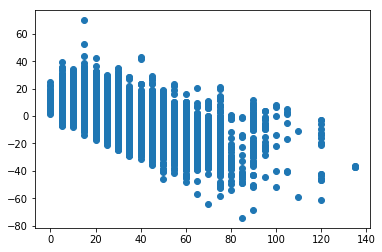

In [140]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test)[:,0] - y_test)




# GET The model to Predict



In [141]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-02-14']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime2.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)

    



[10.7396240234375, 13.447972297668457, 56.114112854003906, 114.96239471435547, 144.31671142578125, 132.10964965820312, 118.7527847290039, 98.31401062011719, 83.86328887939453, 74.93270111083984, 61.393375396728516]


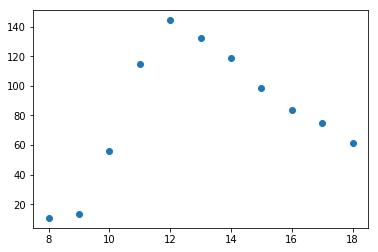

In [142]:
  import matplotlib.pyplot as plt

plt.scatter(time_of_day, waittime2)

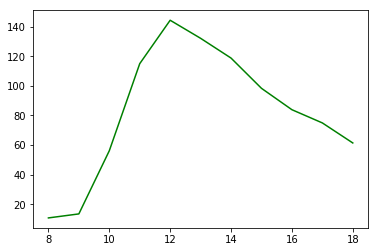

In [143]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime2
#plt.scatter(x, y)

plt.plot(x, y, color="green", label="Wins")

plt.show()

In [149]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-08-20']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime2.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)



[7.287413597106934, 14.980746269226074, 22.78830337524414, 28.522789001464844, 31.287044525146484, 33.86629104614258, 29.0595703125, 23.496318817138672, 18.170352935791016, 13.152216911315918, 9.979974746704102]


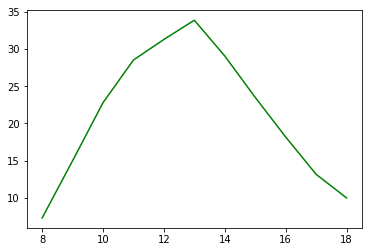

In [150]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime2
#plt.scatter(x, y)

plt.plot(x, y, color="green", label="Wins")

plt.show()